# Laptop Price

In [1]:
# Load Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore")

# Load Data

In [2]:
df = pd.read_csv("laptop_data.csv")
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


# Data Information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [4]:
df.describe()

,Unnamed: 0,Inches,Price
count,1303.00000,1303.000000,1303.000000
mean,651.00000,15.017191,59870.042910
std,376.28801,1.426304,37243.201786
min,0.00000,10.100000,9270.720000
25%,325.50000,14.000000,31914.720000
50%,651.00000,15.600000,52054.560000
75%,976.50000,15.600000,79274.246400
max,1302.00000,18.400000,324954.720000


In [5]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

# Data Preprocessing

In [6]:
# Droping Columns
df.drop("Unnamed: 0", axis=1, inplace=True)
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [7]:
df["Ram"] = df["Ram"].str.replace("GB", "")
df["Ram"] = df["Ram"].astype("int64")

df["Weight"] = df["Weight"].str.replace("kg", "")
df["Weight"] = df["Weight"].astype("float64")

df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [8]:
df.dtypes

Company              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                   int64
Memory               object
Gpu                  object
OpSys                object
Weight              float64
Price               float64
dtype: object

In [9]:
df.describe()

,Inches,Ram,Weight,Price
count,1303.000000,1303.000000,1303.000000,1303.000000
mean,15.017191,8.382195,2.038734,59870.042910
std,1.426304,5.084665,0.665475,37243.201786
min,10.100000,2.000000,0.690000,9270.720000
25%,14.000000,4.000000,1.500000,31914.720000
50%,15.600000,8.000000,2.040000,52054.560000
75%,15.600000,8.000000,2.300000,79274.246400
max,18.400000,64.000000,4.700000,324954.720000


# Data Visualization

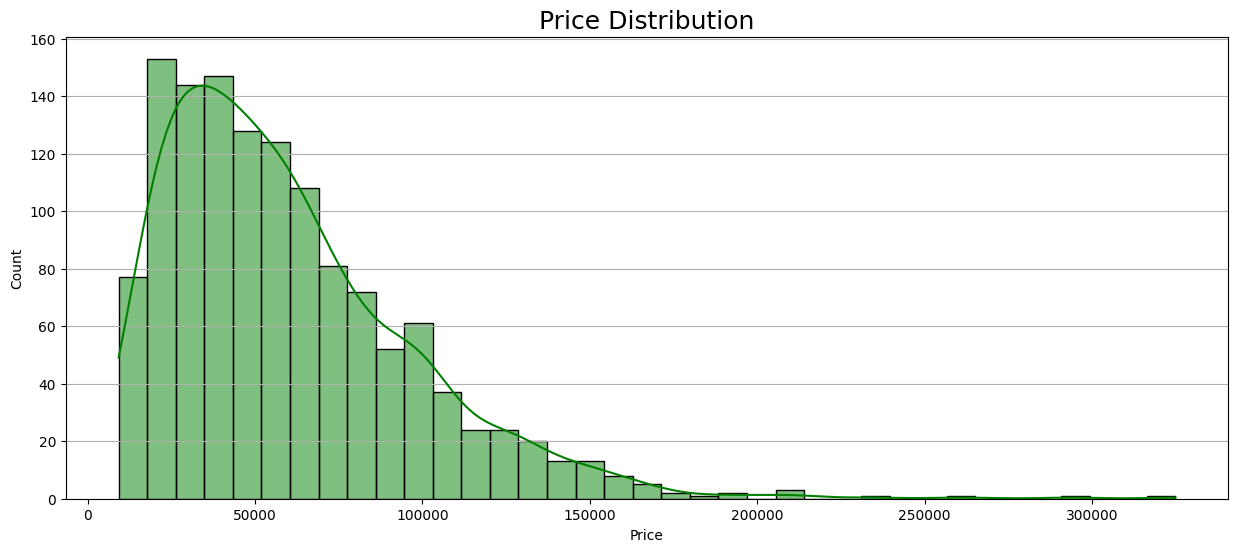

In [10]:
plt.figure(figsize=(15, 6))
sns.histplot(df["Price"], color="green", kde=True)
plt.title("Price Distribution", fontsize=18)
plt.grid(axis="y")
plt.show()

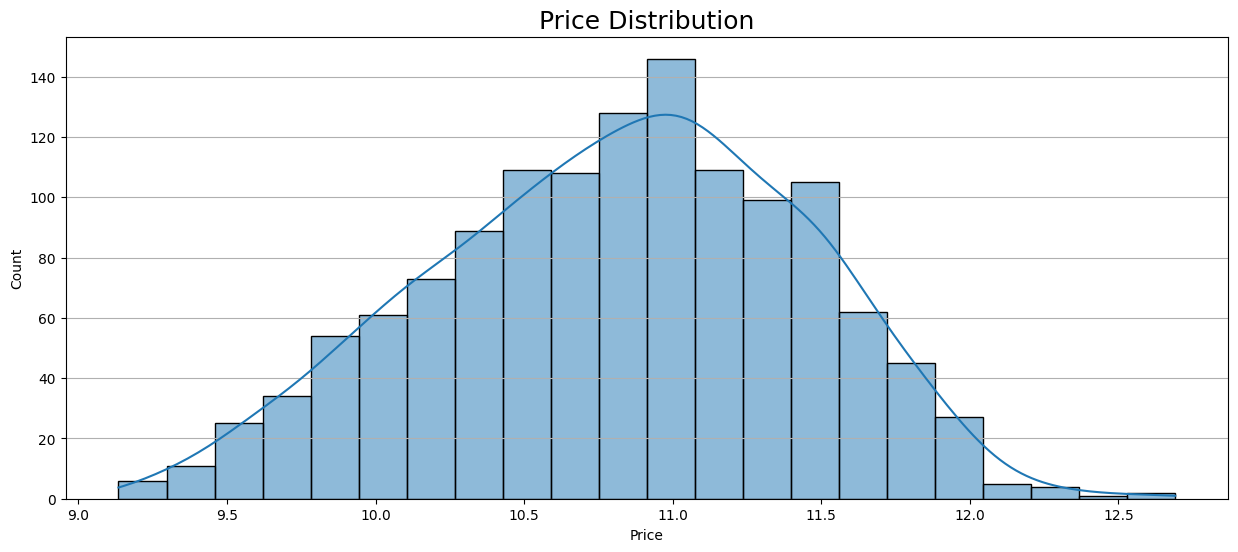

In [11]:
plt.figure(figsize=(15, 6))
sns.histplot(np.log(df["Price"]), kde=True)
plt.title("Price Distribution", fontsize=18)
plt.grid(axis="y")
plt.show()

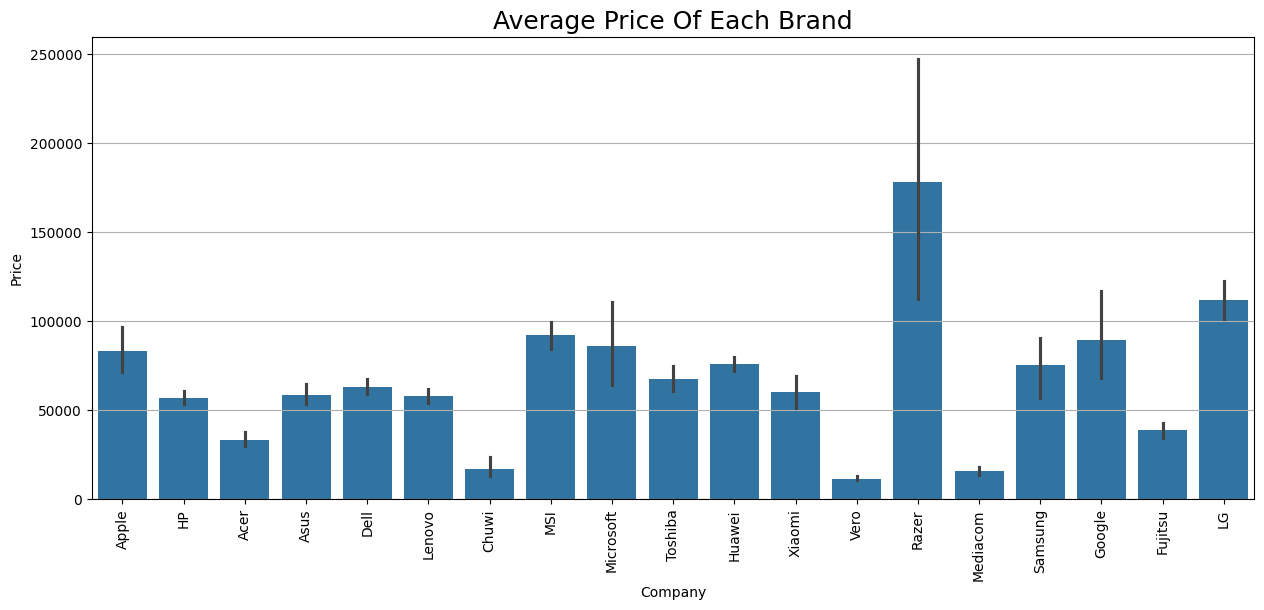

In [12]:
plt.figure(figsize=(15, 6))
sns.barplot(x=df["Company"], y=df["Price"])
plt.title("Average Price Of Each Brand", fontsize=18)
plt.xticks(rotation=90)
plt.grid(axis="y")
plt.show()

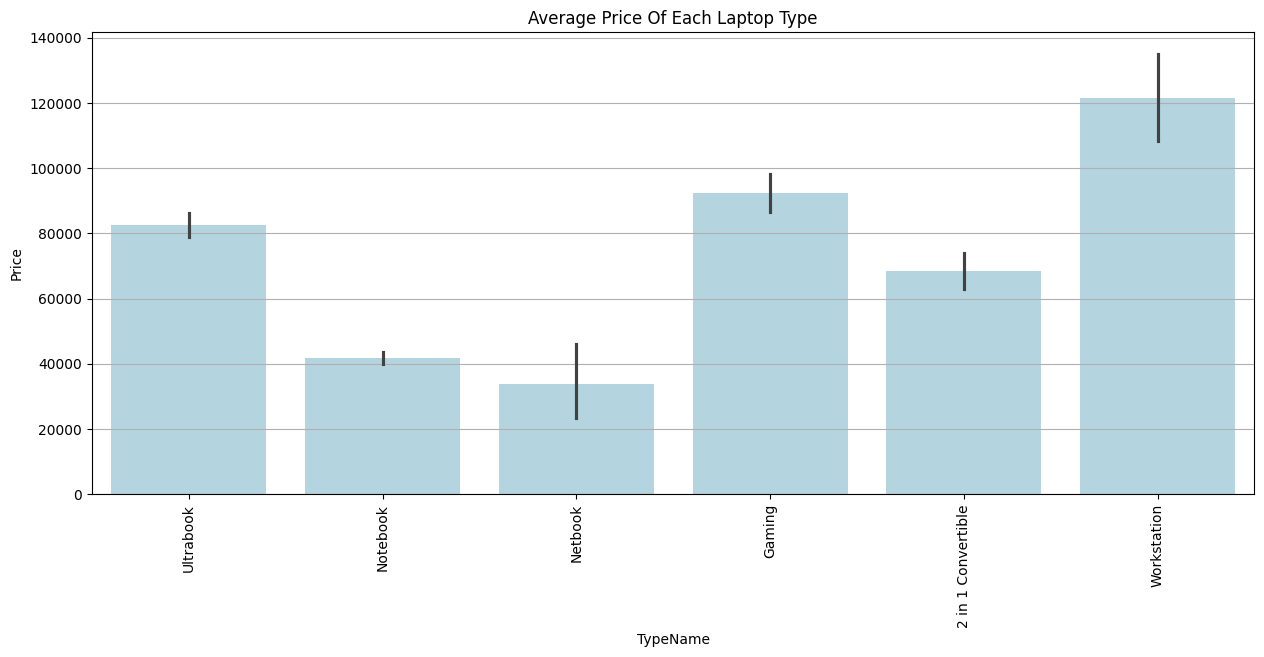

In [13]:
plt.figure(figsize=(15, 6))
sns.barplot(x=df["TypeName"], y=df["Price"], color="lightblue")
plt.title("Average Price Of Each Laptop Type")
plt.xticks(rotation=90)
plt.grid(axis="y")
plt.show()

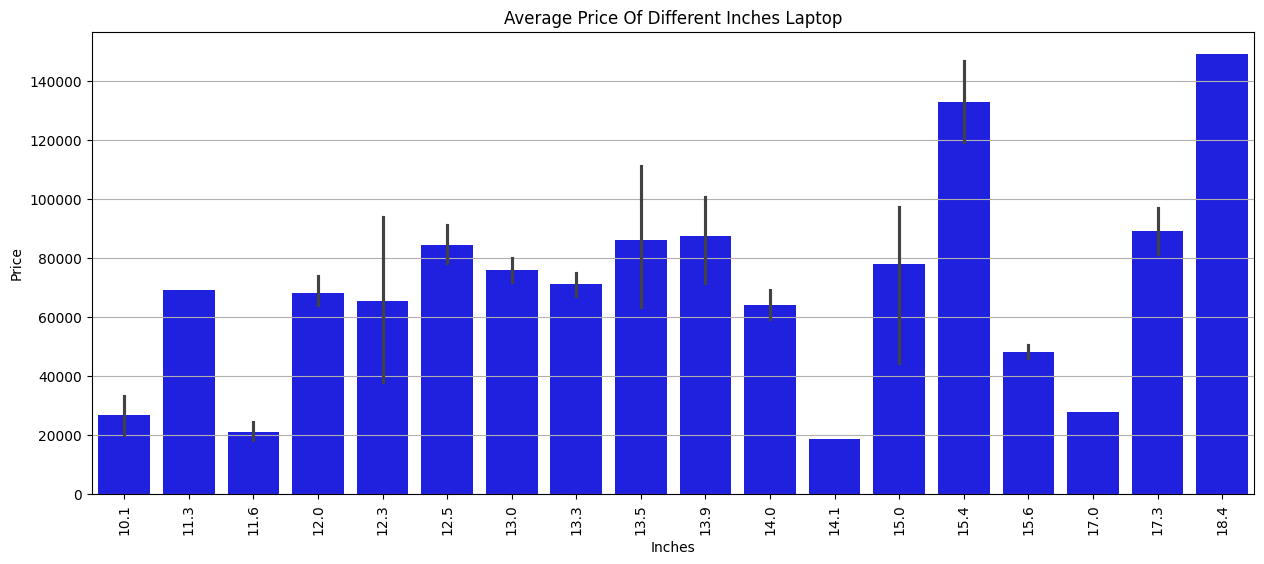

In [14]:
plt.figure(figsize=(15, 6))
sns.barplot(x=df["Inches"], y=df["Price"], color="blue")
plt.title("Average Price Of Different Inches Laptop")
plt.xticks(rotation=90)
plt.grid(axis="y")
plt.show()

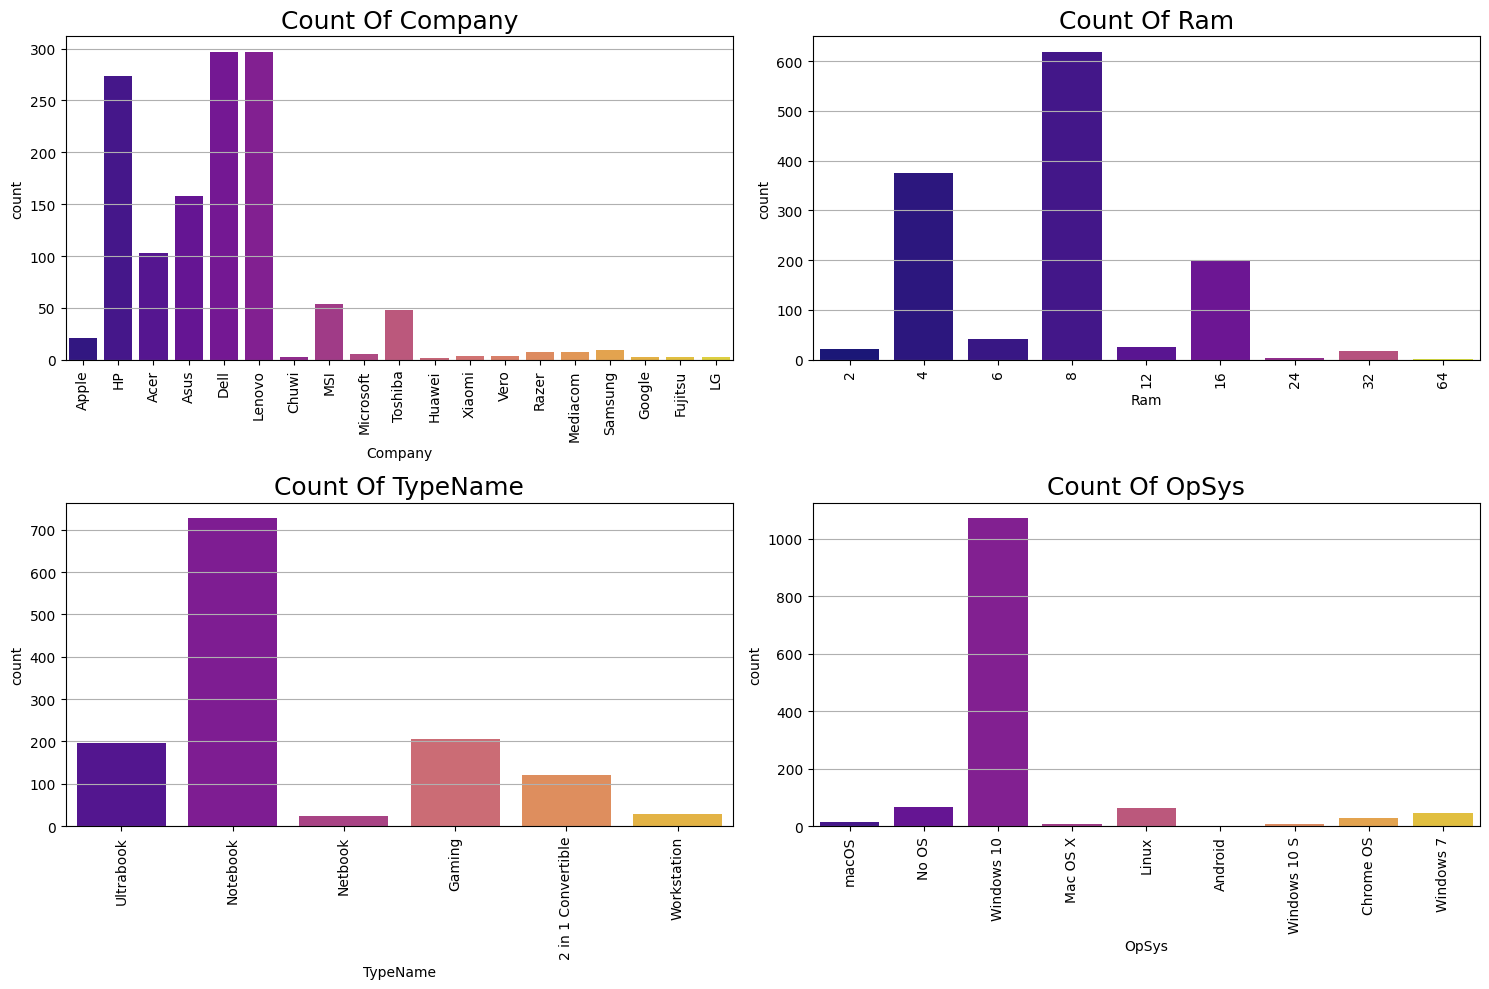

In [15]:
toview = ["Company", "Ram", "TypeName", "OpSys"]

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(toview):
    sns.countplot(x=df[col], hue=df[col], palette="plasma", ax=axes[i], legend=False)
    axes[i].set_title(f"Count Of {col}", fontsize=18)
    axes[i].tick_params(axis="x", rotation=90)
    axes[i].grid(axis="y")
    
plt.tight_layout()
plt.show()

# CPU Analysis

In [16]:
df["Cpu"].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core i5 7200U 2.70GHz        1
Intel Core M M7-6Y75 1.2GHz        1
Intel Core M 6Y54 1.1GHz           1
AMD E-Series 9000 2.2GHz           1
Samsung Cortex A72&A53 2.0GHz      1
Name: count, Length: 118, dtype: int64

In [17]:
df["CPU"] = df["Cpu"].apply(lambda text: " ".join(text.split()[:3]))
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,CPU
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,Intel Core i5
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,Intel Core i5
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,Intel Core i5
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,Intel Core i7
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,Intel Core i5


In [18]:
df.drop("Cpu", axis=1, inplace=True)
df.head()

,Company,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price,CPU
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,Intel Core i5
1,Apple,Ultrabook,13.3,1440x900,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,Intel Core i5
2,HP,Notebook,15.6,Full HD 1920x1080,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,Intel Core i5
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,Intel Core i7
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,Intel Core i5


In [19]:
def processortype(text):
    if text=="Intel Core i3" or text=="Intel Core i5" or text=="Intel Core i7":
        return text

    else:
        if text.split()[0]=="Intel":
            return "Other Intel Processor"

        else:
            return "AMD"

df["CPU"] = df["CPU"].apply(lambda text:processortype(text))
df.head()

,Company,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price,CPU
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,Intel Core i5
1,Apple,Ultrabook,13.3,1440x900,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,Intel Core i5
2,HP,Notebook,15.6,Full HD 1920x1080,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,Intel Core i5
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,Intel Core i7
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,Intel Core i5


# CPU Visualization

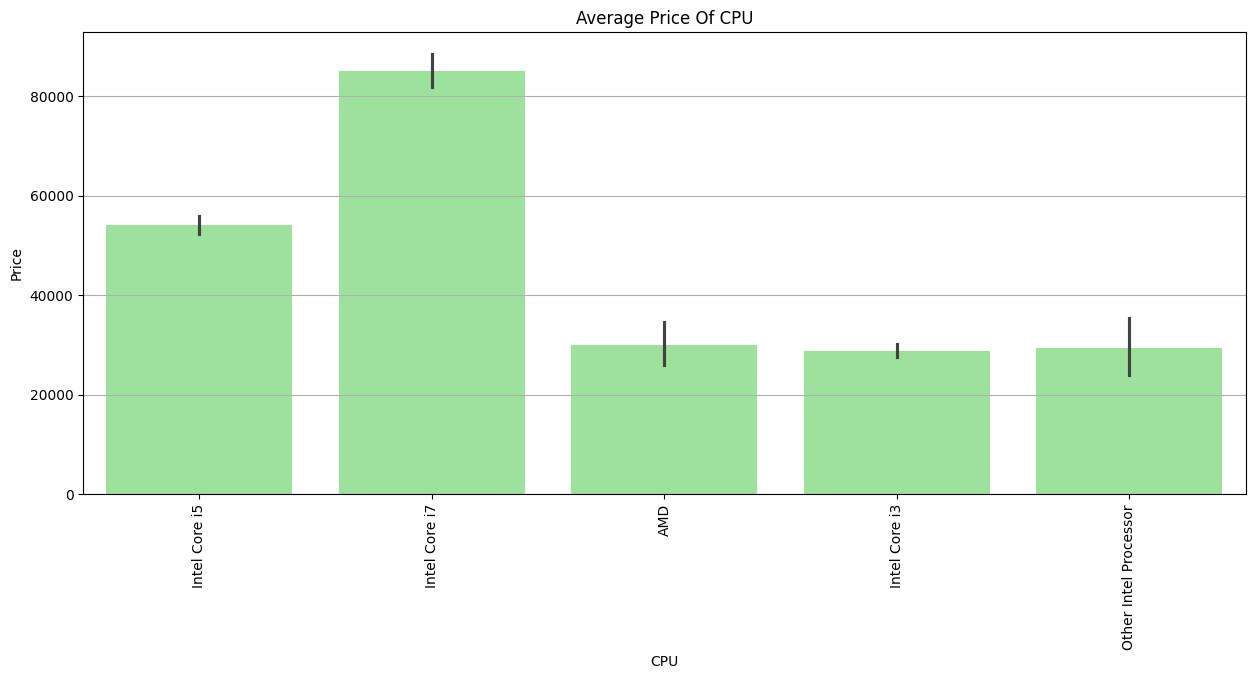

In [20]:
plt.figure(figsize=(15, 6))
sns.barplot(x=df["CPU"], y=df["Price"], color="lightgreen")
plt.title("Average Price Of CPU")
plt.xticks(rotation=90)
plt.grid(axis="y")
plt.show()

# Memory

In [21]:
df["Memory"].iloc[:1][0]

'128GB SSD'

In [22]:
df["Memory"].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
1TB SSD                           14
512GB SSD +  1TB HDD              14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
16GB SSD                           3
512GB SSD +  2TB HDD               3
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
64GB SSD                       

In [23]:
df["Memory"] = df["Memory"].astype(str).replace(".0", "" ,regex = True)
df["Memory"] = df["Memory"].str.replace("GB", "")
df["Memory"] = df["Memory"].str.replace("TB", "000")
newdf = df["Memory"].str.split("+",n = 1,expand = True)
newdf

,0,1
0,128 SSD,None
1,128 Flash Storage,None
2,256 SSD,None
3,512 SSD,None
4,256 SSD,None
...,...,...
1298,128 SSD,None
1299,512 SSD,None
1300,64 Flash Storage,None
1301,1000 HDD,None


In [24]:
df["First"] = newdf[0]
df["First"] = df["First"].str.strip()
df.head()

,Company,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price,CPU,First
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,Intel Core i5,128 SSD
1,Apple,Ultrabook,13.3,1440x900,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,Intel Core i5,128 Flash Storage
2,HP,Notebook,15.6,Full HD 1920x1080,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,Intel Core i5,256 SSD
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,Intel Core i7,512 SSD
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,Intel Core i5,256 SSD


In [25]:
def applychanges(value):
    
    df["Layer1"+value] = df["First"].apply(lambda x:1 if value in x else 0)
    
    
listtoapply = ["HDD", "SSD", "Hybrid", "FlashStorage"]    
for value in listtoapply:
    applychanges(value)
    
    
df.head()

,Company,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price,CPU,First,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1FlashStorage
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,Intel Core i5,128 SSD,0,1,0,0
1,Apple,Ultrabook,13.3,1440x900,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,Intel Core i5,128 Flash Storage,0,0,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,Intel Core i5,256 SSD,0,1,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,Intel Core i7,512 SSD,0,1,0,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,Intel Core i5,256 SSD,0,1,0,0


In [26]:
df["First"] = df["First"].str.replace(r"\D", "" , regex=True)
df["First"].value_counts()

First
256     508
1000    250
128     177
512     140
0       132
32       45
64       17
2000     16
16       10
1         5
8         2
2         1
Name: count, dtype: int64

In [27]:
df["Second"] = newdf[1]
df.head()

,Company,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price,CPU,First,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1FlashStorage,Second
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,Intel Core i5,128,0,1,0,0,None
1,Apple,Ultrabook,13.3,1440x900,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,Intel Core i5,128,0,0,0,0,None
2,HP,Notebook,15.6,Full HD 1920x1080,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,Intel Core i5,256,0,1,0,0,None
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,Intel Core i7,512,0,1,0,0,None
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,Intel Core i5,256,0,1,0,0,None


In [28]:
def applychanges1(value):
    df["Layer2" + value] = df["Second"].apply(lambda x:1 if value in x else 0)

listtoapply1 = ["HDD", "SSD", "Hybrid", "FlashStorage"]
df["Second"] = df["Second"].fillna("0")
for value in listtoapply1:
    applychanges1(value)

df.head()

,Company,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price,...,First,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1FlashStorage,Second,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2FlashStorage
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,...,128,0,1,0,0,0,0,0,0,0
1,Apple,Ultrabook,13.3,1440x900,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,...,128,0,0,0,0,0,0,0,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,...,256,0,1,0,0,0,0,0,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,...,512,0,1,0,0,0,0,0,0,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,...,256,0,1,0,0,0,0,0,0,0


In [29]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Ram', 'Memory',
       'Gpu', 'OpSys', 'Weight', 'Price', 'CPU', 'First', 'Layer1HDD',
       'Layer1SSD', 'Layer1Hybrid', 'Layer1FlashStorage', 'Second',
       'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid', 'Layer2FlashStorage'],
      dtype='object')

In [30]:
df["Second"] = df["Second"].str.replace(r"\D", "", regex=True)
df["Second"].value_counts()

Second
0       1097
1000     187
2000      15
256        3
512        1
Name: count, dtype: int64

In [31]:
df["HDD"] = (df["First"] * df["Layer1HDD"] + df["Second"] * df["Layer2HDD"])
df["SSD"] = (df["First"] * df["Layer1SSD"] + df["Second"] * df["Layer2SSD"])
df["Hybrid"] = (df["First"] * df["Layer1Hybrid"] + df["Second"] * df["Layer2Hybrid"])
df["Flash_Storage"] = (df["First"] * df["Layer1FlashStorage"] + df["Second"] * df["Layer2FlashStorage"])

In [32]:
df.drop(columns=['Memory', 'First', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid', 'Layer1FlashStorage',
                 'Second', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid', 'Layer2FlashStorage', 'Hybrid', 'Flash_Storage'], inplace=True)
df.head()

,Company,TypeName,Inches,ScreenResolution,Ram,Gpu,OpSys,Weight,Price,CPU,HDD,SSD
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,Intel Core i5,,128
1,Apple,Ultrabook,13.3,1440x900,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,Intel Core i5,,
2,HP,Notebook,15.6,Full HD 1920x1080,8,Intel HD Graphics 620,No OS,1.86,30636.0000,Intel Core i5,,256
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,Intel Core i7,,512
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,Intel Core i5,,256


In [33]:
df["HDD"] = pd.to_numeric(df["HDD"], errors='coerce').fillna(0)
df["SSD"] = pd.to_numeric(df["SSD"], errors='coerce').fillna(0)

df["Storage"] = df["HDD"] + df["SSD"]
df.head()

,Company,TypeName,Inches,ScreenResolution,Ram,Gpu,OpSys,Weight,Price,CPU,HDD,SSD,Storage
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,Intel Core i5,0.0,128.0,128.0
1,Apple,Ultrabook,13.3,1440x900,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,Intel Core i5,0.0,0.0,0.0
2,HP,Notebook,15.6,Full HD 1920x1080,8,Intel HD Graphics 620,No OS,1.86,30636.0000,Intel Core i5,0.0,256.0,256.0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,Intel Core i7,0.0,512.0,512.0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,Intel Core i5,0.0,256.0,256.0


# Memory Visualization

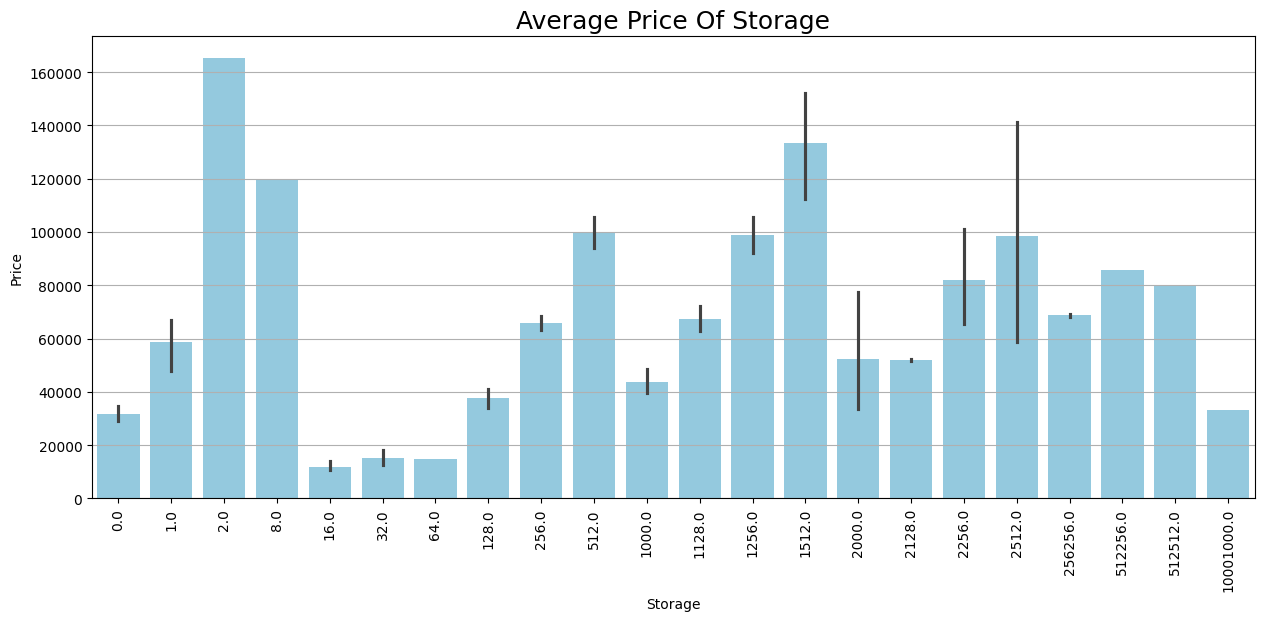

In [34]:
plt.figure(figsize=(15, 6))
sns.barplot(x=df["Storage"], y=df["Price"], color="skyblue")
plt.title("Average Price Of Storage", fontsize=18)
plt.xticks(rotation=90)
plt.grid(axis="y")
plt.show()

# GPU Analysis

In [35]:
df["Gpu"].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
Nvidia Quadro M500M          1
AMD Radeon R7 M360           1
Nvidia Quadro M3000M         1
Nvidia GeForce 960M          1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [36]:
df["GPU"] = df["Gpu"].apply(lambda text:" ".join(text.split()[:1]))
df.head()

,Company,TypeName,Inches,ScreenResolution,Ram,Gpu,OpSys,Weight,Price,CPU,HDD,SSD,Storage,GPU
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,Intel Core i5,0.0,128.0,128.0,Intel
1,Apple,Ultrabook,13.3,1440x900,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,Intel Core i5,0.0,0.0,0.0,Intel
2,HP,Notebook,15.6,Full HD 1920x1080,8,Intel HD Graphics 620,No OS,1.86,30636.0000,Intel Core i5,0.0,256.0,256.0,Intel
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,Intel Core i7,0.0,512.0,512.0,AMD
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,Intel Core i5,0.0,256.0,256.0,Intel


In [37]:
df.drop(columns=["Gpu"], inplace=True)
df.head()

,Company,TypeName,Inches,ScreenResolution,Ram,OpSys,Weight,Price,CPU,HDD,SSD,Storage,GPU
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,macOS,1.37,71378.6832,Intel Core i5,0.0,128.0,128.0,Intel
1,Apple,Ultrabook,13.3,1440x900,8,macOS,1.34,47895.5232,Intel Core i5,0.0,0.0,0.0,Intel
2,HP,Notebook,15.6,Full HD 1920x1080,8,No OS,1.86,30636.0000,Intel Core i5,0.0,256.0,256.0,Intel
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,macOS,1.83,135195.3360,Intel Core i7,0.0,512.0,512.0,AMD
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,macOS,1.37,96095.8080,Intel Core i5,0.0,256.0,256.0,Intel


# GPU Visualization

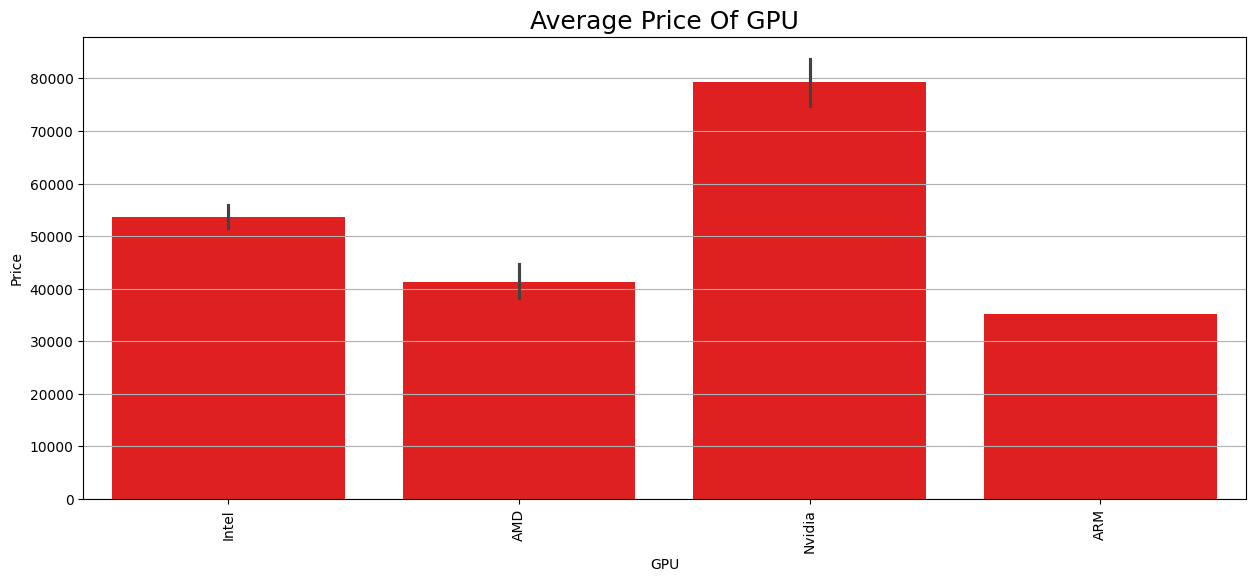

In [38]:
plt.figure(figsize=(15, 6))
sns.barplot(x=df["GPU"], y=df["Price"], color="red")
plt.title("Average Price Of GPU", fontsize=18)
plt.xticks(rotation=90)
plt.grid(axis="y")
plt.show()

# Screen Resolution Analysis

In [39]:
df["ScreenResolution"].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
IPS Panel 1366x768                                 7
Touchscreen 2560x1440                              7
4K Ultra HD 3840x2160                              7
IPS Panel Retina Display 2304x1440                 6
IPS Panel Retina Display 2560x1600                 6
Touchscreen 2256x1504                              6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Touchscreen 2560x14

In [40]:
df["TouchScreen"] = df["ScreenResolution"].apply(lambda element:1 if "TouchScreen" in element else 0)
df["IPS"] = df["ScreenResolution"].apply(lambda element:1 if "IPS" in element else 0)

df.head()

,Company,TypeName,Inches,ScreenResolution,Ram,OpSys,Weight,Price,CPU,HDD,SSD,Storage,GPU,TouchScreen,IPS
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,macOS,1.37,71378.6832,Intel Core i5,0.0,128.0,128.0,Intel,0,1
1,Apple,Ultrabook,13.3,1440x900,8,macOS,1.34,47895.5232,Intel Core i5,0.0,0.0,0.0,Intel,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,8,No OS,1.86,30636.0000,Intel Core i5,0.0,256.0,256.0,Intel,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,macOS,1.83,135195.3360,Intel Core i7,0.0,512.0,512.0,AMD,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,macOS,1.37,96095.8080,Intel Core i5,0.0,256.0,256.0,Intel,0,1


In [41]:
splitdf = df["ScreenResolution"].str.split("x", n = 1, expand=True)
splitdf.head()

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600


In [42]:
df["X_Res"] = splitdf[0]
df["Y_Res"] = splitdf[1]

df.head()

,Company,TypeName,Inches,ScreenResolution,Ram,OpSys,Weight,Price,CPU,HDD,SSD,Storage,GPU,TouchScreen,IPS,X_Res,Y_Res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,macOS,1.37,71378.6832,Intel Core i5,0.0,128.0,128.0,Intel,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,8,macOS,1.34,47895.5232,Intel Core i5,0.0,0.0,0.0,Intel,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,8,No OS,1.86,30636.0000,Intel Core i5,0.0,256.0,256.0,Intel,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,macOS,1.83,135195.3360,Intel Core i7,0.0,512.0,512.0,AMD,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,macOS,1.37,96095.8080,Intel Core i5,0.0,256.0,256.0,Intel,0,1,IPS Panel Retina Display 2560,1600


In [43]:
df["X_Res"] = df["X_Res"].str.replace(",", "").str.findall(r"(\d+.?\d+)").apply(lambda x:x[0])
df.head()

,Company,TypeName,Inches,ScreenResolution,Ram,OpSys,Weight,Price,CPU,HDD,SSD,Storage,GPU,TouchScreen,IPS,X_Res,Y_Res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,macOS,1.37,71378.6832,Intel Core i5,0.0,128.0,128.0,Intel,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,8,macOS,1.34,47895.5232,Intel Core i5,0.0,0.0,0.0,Intel,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,8,No OS,1.86,30636.0000,Intel Core i5,0.0,256.0,256.0,Intel,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,macOS,1.83,135195.3360,Intel Core i7,0.0,512.0,512.0,AMD,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,macOS,1.37,96095.8080,Intel Core i5,0.0,256.0,256.0,Intel,0,1,2560,1600


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Ram               1303 non-null   int64  
 5   OpSys             1303 non-null   object 
 6   Weight            1303 non-null   float64
 7   Price             1303 non-null   float64
 8   CPU               1303 non-null   object 
 9   HDD               1303 non-null   float64
 10  SSD               1303 non-null   float64
 11  Storage           1303 non-null   float64
 12  GPU               1303 non-null   object 
 13  TouchScreen       1303 non-null   int64  
 14  IPS               1303 non-null   int64  
 15  X_Res             1303 non-null   object 
 16  Y_Res             1303 non-null   object 


In [45]:
df["X_Res"] = df["X_Res"].astype("int64")
df["Y_Res"] = df["Y_Res"].astype("int64")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Ram               1303 non-null   int64  
 5   OpSys             1303 non-null   object 
 6   Weight            1303 non-null   float64
 7   Price             1303 non-null   float64
 8   CPU               1303 non-null   object 
 9   HDD               1303 non-null   float64
 10  SSD               1303 non-null   float64
 11  Storage           1303 non-null   float64
 12  GPU               1303 non-null   object 
 13  TouchScreen       1303 non-null   int64  
 14  IPS               1303 non-null   int64  
 15  X_Res             1303 non-null   int64  
 16  Y_Res             1303 non-null   int64  


In [46]:
df["PPI"] = (((df["X_Res"]**2 + df["Y_Res"]**2))**.5 / df["Inches"]).astype("float64")
df.head()

,Company,TypeName,Inches,ScreenResolution,Ram,OpSys,Weight,Price,CPU,HDD,SSD,Storage,GPU,TouchScreen,IPS,X_Res,Y_Res,PPI
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,macOS,1.37,71378.6832,Intel Core i5,0.0,128.0,128.0,Intel,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,8,macOS,1.34,47895.5232,Intel Core i5,0.0,0.0,0.0,Intel,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,8,No OS,1.86,30636.0000,Intel Core i5,0.0,256.0,256.0,Intel,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,macOS,1.83,135195.3360,Intel Core i7,0.0,512.0,512.0,AMD,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,macOS,1.37,96095.8080,Intel Core i5,0.0,256.0,256.0,Intel,0,1,2560,1600,226.983005


In [47]:
df.drop(columns=["ScreenResolution", "Inches", "X_Res", "Y_Res"], inplace=True)
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,CPU,HDD,SSD,Storage,GPU,TouchScreen,IPS,PPI
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,Intel Core i5,0.0,128.0,128.0,Intel,0,1,226.983005
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,Intel Core i5,0.0,0.0,0.0,Intel,0,0,127.677940
2,HP,Notebook,8,No OS,1.86,30636.0000,Intel Core i5,0.0,256.0,256.0,Intel,0,0,141.211998
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,Intel Core i7,0.0,512.0,512.0,AMD,0,1,220.534624
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,Intel Core i5,0.0,256.0,256.0,Intel,0,1,226.983005


# OS Analysis

In [48]:
df["OpSys"].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

In [49]:
def categories(text):
    if text == "Windows 10" or text == "Windows 7" or text == "Windows 10 S":
        return "Windows"

    elif text == "Mac OS X" or text == "macOS":
        return "MAC"

    elif text == "Linux":
        return "Linux"

    else:
        return "Other"

df["OpSys"] = df["OpSys"].apply(lambda x:categories(x))
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,CPU,HDD,SSD,Storage,GPU,TouchScreen,IPS,PPI
0,Apple,Ultrabook,8,MAC,1.37,71378.6832,Intel Core i5,0.0,128.0,128.0,Intel,0,1,226.983005
1,Apple,Ultrabook,8,MAC,1.34,47895.5232,Intel Core i5,0.0,0.0,0.0,Intel,0,0,127.677940
2,HP,Notebook,8,Other,1.86,30636.0000,Intel Core i5,0.0,256.0,256.0,Intel,0,0,141.211998
3,Apple,Ultrabook,16,MAC,1.83,135195.3360,Intel Core i7,0.0,512.0,512.0,AMD,0,1,220.534624
4,Apple,Ultrabook,8,MAC,1.37,96095.8080,Intel Core i5,0.0,256.0,256.0,Intel,0,1,226.983005


In [50]:
df.sample(5)

,Company,TypeName,Ram,OpSys,Weight,Price,CPU,HDD,SSD,Storage,GPU,TouchScreen,IPS,PPI
493,Acer,Notebook,8,Windows,2.20,30849.1200,AMD,1000.0,0.0,1000.0,AMD,0,0,100.454670
413,Acer,2 in 1 Convertible,8,Windows,1.60,42038.4528,Intel Core i7,0.0,256.0,256.0,Intel,0,1,165.632118
163,Lenovo,Gaming,16,Windows,2.50,57489.1200,Intel Core i7,0.0,256.0,256.0,Nvidia,0,1,141.211998
95,Acer,2 in 1 Convertible,8,Windows,1.50,45128.1600,Intel Core i5,0.0,256.0,256.0,Intel,0,1,165.632118
659,Dell,Gaming,32,Windows,4.42,167691.8736,Intel Core i7,1000.0,512.0,1512.0,Nvidia,0,1,254.671349


# OS Visualization

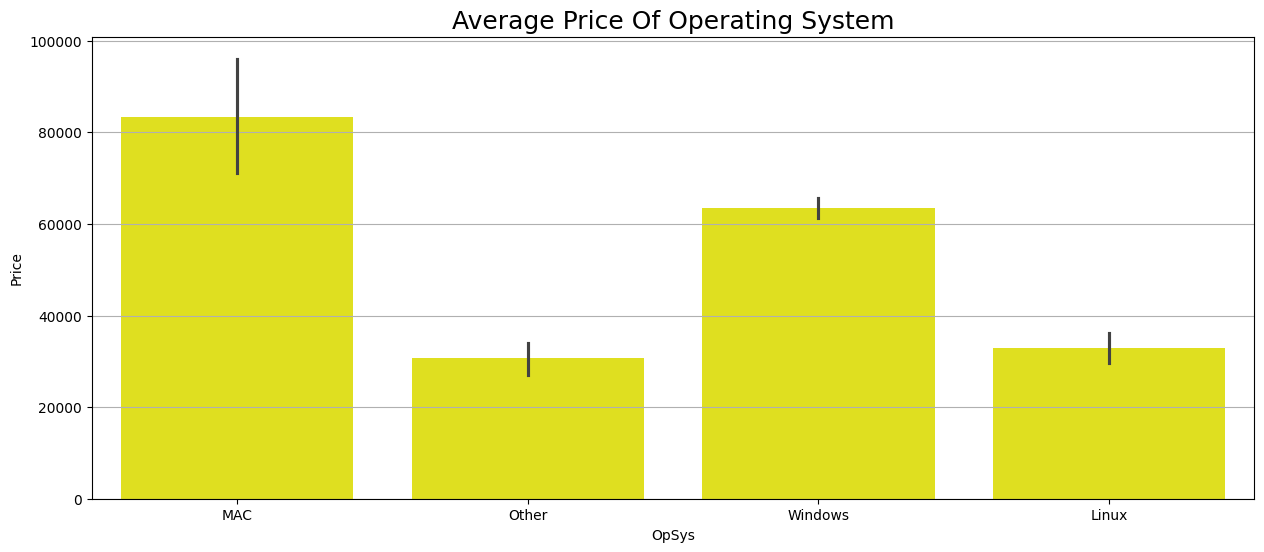

In [51]:
plt.figure(figsize=(15, 6))
sns.barplot(x=df["OpSys"], y=df["Price"], color="yellow")
plt.title("Average Price Of Operating System", fontsize=18)
plt.grid(axis="y")
plt.show()

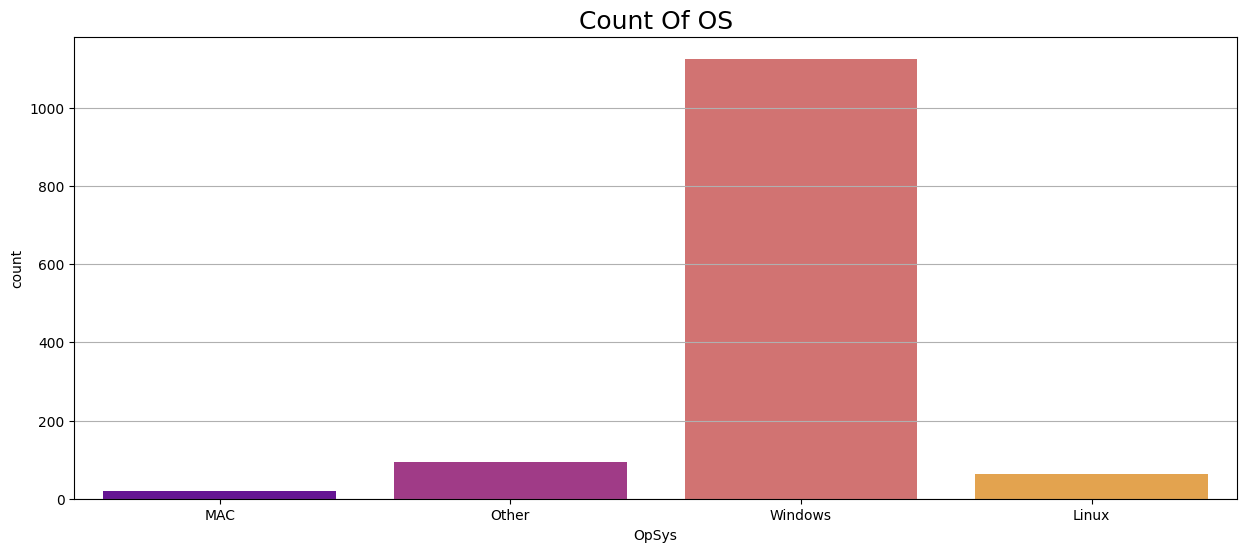

In [52]:
plt.figure(figsize=(15, 6))
sns.countplot(x=df["OpSys"], hue=df["OpSys"], palette="plasma")
plt.title("Count Of OS", fontsize=18)
plt.grid(axis="y")
plt.show()

# Model

In [53]:
x = df.drop("Price", axis=1)
y = df[["Price"]]

In [54]:
x.head()

,Company,TypeName,Ram,OpSys,Weight,CPU,HDD,SSD,Storage,GPU,TouchScreen,IPS,PPI
0,Apple,Ultrabook,8,MAC,1.37,Intel Core i5,0.0,128.0,128.0,Intel,0,1,226.983005
1,Apple,Ultrabook,8,MAC,1.34,Intel Core i5,0.0,0.0,0.0,Intel,0,0,127.677940
2,HP,Notebook,8,Other,1.86,Intel Core i5,0.0,256.0,256.0,Intel,0,0,141.211998
3,Apple,Ultrabook,16,MAC,1.83,Intel Core i7,0.0,512.0,512.0,AMD,0,1,220.534624
4,Apple,Ultrabook,8,MAC,1.37,Intel Core i5,0.0,256.0,256.0,Intel,0,1,226.983005


In [55]:
y.head()

,Price
0,71378.6832
1,47895.5232
2,30636.0000
3,135195.3360
4,96095.8080


In [56]:
categorical_features = x.select_dtypes(include=["object"]).columns.tolist()
categorical_features

['Company', 'TypeName', 'OpSys', 'CPU', 'GPU']

In [57]:
categorical_features_index = [x.columns.get_loc(col) for col in categorical_features]
categorical_features_index

[0, 1, 3, 5, 9]

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=40)

In [59]:
model_CBR = CatBoostRegressor(
    iterations=1000,
    learning_rate=.5,
    depth=7,
    verbose=False
)

model_CBR.fit(x_train, y_train, cat_features=categorical_features_index)

In [60]:
y_pred = model_CBR.predict(x_test)

In [61]:
score = round(model_CBR.score(x_test, y_test) * 100, 2)
print(f"{score}%")

83.26%


In [62]:
test_mse = mean_squared_error(y_test, y_pred)
test_mae = mean_absolute_error(y_test, y_pred)
test_rmse = root_mean_squared_error(y_test, y_pred)
test_r2_score = r2_score(y_test, y_pred)

print(f"Test MSE: {test_mse:.2f}%")
print(f"Test MAE: {test_mae:.2f}%")
print(f"Test RMSE: {test_rmse:.2f}%")
print(f"Test R2 SCORE: {test_r2_score:.2f}%")

Test MSE: 224973415.18%
Test MAE: 10605.85%
Test RMSE: 14999.11%
Test R2 SCORE: 0.83%


# 🧾 **Conclusion**

### ✅ **Project Summary**
- Built a complete machine learning pipeline to predict laptop prices.
- Performed data cleaning: handled missing values, formatting issues, and removed unwanted characters.
- Encoded categorical features such as Brand, CPU, GPU, and Storage Type.
- Applied feature engineering and standardized numerical columns for better modeling.

### 🧠 **ML Models Used**
- **Linear Regression** – baseline model.
- **Random Forest Regressor** – handled complex patterns better.
- **CatBoost Regressor** – best model with highest accuracy and minimal preprocessing.

### 📊 **Key Insights**
- Laptop price is mainly influenced by CPU generation, RAM, GPU, storage type, and display quality.
- CatBoost performed the best because it naturally handles categorical data.
- Evaluation metrics (MAE, MSE, RMSE, R²) confirmed strong predictive performance.

### 🚀 **Project Achievements**
- Developed an end-to-end ML solution for laptop price prediction.
- Demonstrated strong understanding of preprocessing, feature engineering, and model evaluation.
- Built a reliable model suitable for real-world use cases like e-commerce price estimation.

### 🔮 **Future Improvements**
- Hyperparameter tuning for even better accuracy.
- Expand dataset with more laptop brands and updated models.
- Deploy the model using a web app or REST API.
- Explore deep learning or stacked ensemble methods.